MLP是大腦，CNN是眼睛

In [ ]:
from keras.applications.vgg16 import VGG16
#因為要使用自己訓練的MLP所以設定include_top=False，不使用預設
vgg = VGG16(include_top=False, input_shape=(224,224,3))
vgg.summary()

58892288/58889256 [==============================] - 63s 1us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_poo

In [3]:
#使用cifar10資料集
from keras.datasets.cifar10 import load_data
# ((訓練x, 訓練y), (測試x, 測試y))
((x_train, y_train),(x_test, y_test))=load_data()

170500096/170498071 [==============================] - 430s 3us/step


In [4]:
print("訓練的維度:", x_train.shape)
print("測試的維度:", x_test.shape)
#因為是彩色的所以跑出來有3層(32,32,3)

訓練的維度: (50000, 32, 32, 3)
測試的維度: (10000, 32, 32, 3)


In [5]:
#設定標籤
mapdict = {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙",
           7:"馬", 8:"船", 9:"貨車"}

標籤: 馬


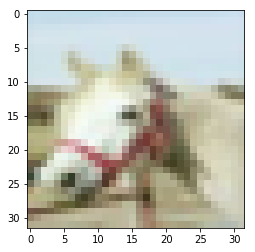

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
#有50000筆資料
c = random.randint(0, 49999)
print("標籤:", mapdict[y_train[c][0]])
plt.imshow(x_train[c])

In [7]:
# normalize: (0~1)
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# 目標: one-hot encoding
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
cnn = Sequential()
# 第一層: 把input shape設好，使用relu來激活
cnn.add(Conv2D(input_shape=(32, 32, 3), 
               kernel_size=(3, 3), 
               filters=32, 
               padding="same", 
               activation="relu"))
#池化:減少計算量
cnn.add(MaxPooling2D(pool_size=2))
#第二層filters*2再跑一次，使用relu來激活
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=64, 
               padding="same", 
               activation="relu"))
#池化:減少計算量
cnn.add(MaxPooling2D(pool_size=2))
#第三層filters*2再跑一次，使用relu來激活
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=128, 
               padding="same", 
               activation="relu"))
#池化:減少計算量
cnn.add(MaxPooling2D(pool_size=2))
#攤平，把二維(4*4)轉成一維
cnn.add(Flatten())
#將攤平後的2048比數量進行縮減，取二的倍數256
cnn.add(Dense(units=256, activation="relu"))
#最後一次激活使用activation="softmax"
cnn.add(Dense(units=10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

#如果擔心過擬合可以使用Dropout的方法，drop 20%-50%的資料

In [10]:
# 二分:binary_crossentropy
# 多元:categorical_crossentropy
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# batch_size: 每看幾筆做一次梯度更新(100~200)
# epochs: 每一筆資料要看過幾次
# 總梯度更新次數: 資料筆數 * epochs / batch_size
# validation_split: train_test_split
# verbose: 輸出log的程度, 2
train_history = cnn.fit(x_train_shape, y_train_onehot, batch_size=200, 
                epochs=10, validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 52s - loss: 1.6079 - acc: 0.4198 - val_loss: 1.3026 - val_acc: 0.5422
Epoch 2/10
 - 51s - loss: 1.2049 - acc: 0.5738 - val_loss: 1.0733 - val_acc: 0.6236
Epoch 3/10
 - 50s - loss: 1.0151 - acc: 0.6471 - val_loss: 0.9585 - val_acc: 0.6620
Epoch 4/10
 - 50s - loss: 0.8916 - acc: 0.6874 - val_loss: 0.8900 - val_acc: 0.6936
Epoch 5/10
 - 50s - loss: 0.8147 - acc: 0.7152 - val_loss: 0.8405 - val_acc: 0.7154
Epoch 6/10
 - 50s - loss: 0.7438 - acc: 0.7424 - val_loss: 0.8077 - val_acc: 0.7214
Epoch 7/10
 - 50s - loss: 0.6678 - acc: 0.7674 - val_loss: 0.7741 - val_acc: 0.7404
Epoch 8/10
 - 50s - loss: 0.6089 - acc: 0.7893 - val_loss: 0.7886 - val_acc: 0.7280
Epoch 9/10
 - 50s - loss: 0.5555 - acc: 0.8070 - val_loss: 0.7501 - val_acc: 0.7470
Epoch 10/10
 - 50s - loss: 0.5018 - acc: 0.8256 - val_loss: 0.7194 - val_acc: 0.7544


In [12]:
#衡量結果
cnn.evaluate(x_test_shape, y_test_onehot)

10000/10000 [==============================] - 4s 418us/step


[0.7789720685958862, 0.7405]

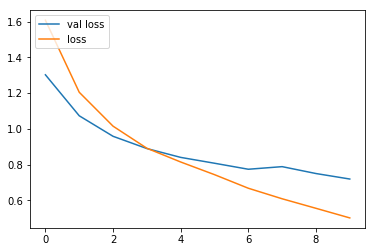

In [15]:
# 怎麼看幾次要停 - val_loss(藍線) -> 平緩 就可以停
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history["val_loss"])
plt.plot(train_history.history["loss"])
plt.legend(["val loss", "loss"], loc="upper left")

In [16]:
import pandas as pd
# {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙",7:"馬", 8:"船", 9:"貨車"}
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(cnn.predict_classes(x_test_shape), y_test))

,0,1,2,3,4,5,6,7,8,9
0,790,14,68,24,18,17,6,12,55,34
1,17,852,4,5,5,4,8,4,24,81
2,26,2,598,55,69,36,42,39,10,10
3,21,4,69,559,59,141,47,42,11,18
4,15,3,72,68,675,48,31,47,8,3
5,7,4,56,148,37,666,34,49,5,14
6,7,11,68,65,58,30,809,5,4,4
7,15,2,45,34,59,38,4,791,3,9
8,72,33,16,22,16,9,11,3,866,28
9,30,75,4,20,4,11,8,8,14,799
